### Below are the checks need to be done
1. Is there any relationship between who a person works for and their performance score?
2. What is the overall diversity profile of the organization?
3. What are our best recruiting sources if we want to ensure a diverse organization?
4. Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?
5. Are there areas of the company where pay is not equitable?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Downloads/HRDataset_v14.csv")
df.shape

(311, 36)

In [3]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


In [6]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

### There are null values in Date of Termination column which will be filled using fillna

In [7]:
df["DateofTermination"].fillna(value = "NA" , inplace = True)

In [8]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [9]:
df["Sex"].unique()

array(['M ', 'F'], dtype=object)

In [10]:
df["Department"].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [11]:
df["RecruitmentSource"].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

In [12]:
df["Position"].unique()

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

In [13]:
df["ManagerID"] = df["ManagerID"].replace(np.nan, 39.0)

### Data Analyst is written two different ways

In [15]:
df["Position"].replace("Data Analyst","Data Analyst ",inplace = True)

In [16]:
df["PerformanceScore"].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [17]:
df["PerfScoreID"].unique()

array([4, 3, 2, 1], dtype=int64)

In [18]:
print(df["PerformanceScore"].unique())
print(df["PerfScoreID"].unique())

['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']
[4 3 2 1]


In [19]:
df.drop(["DaysLateLast30","LastPerformanceReview_Date"], axis = 1, inplace = True)

### 2. Overall Diversity profile of the Organization

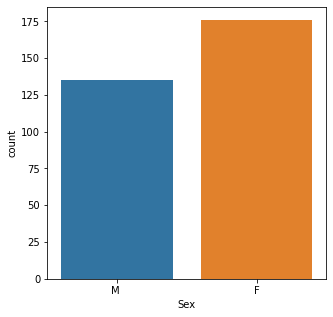

In [23]:
plt.figure(figsize = (5,5))
sns.countplot(x = df["Sex"])
plt.show()

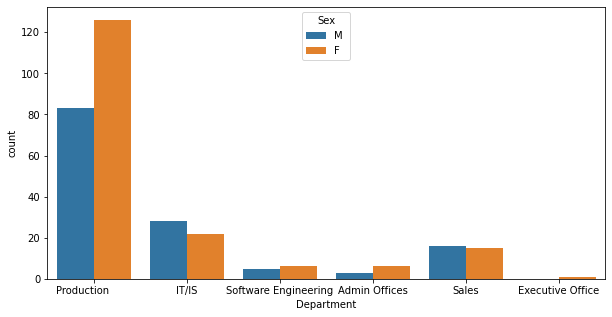

In [27]:
plt.figure(figsize = (10,5))
sns.countplot(x = df["Department"], hue = df["Sex"])
plt.show()

### Organization has more number female employess tha male employees and Production dept has majority female employees

### Relationship between the person works for and their performance score

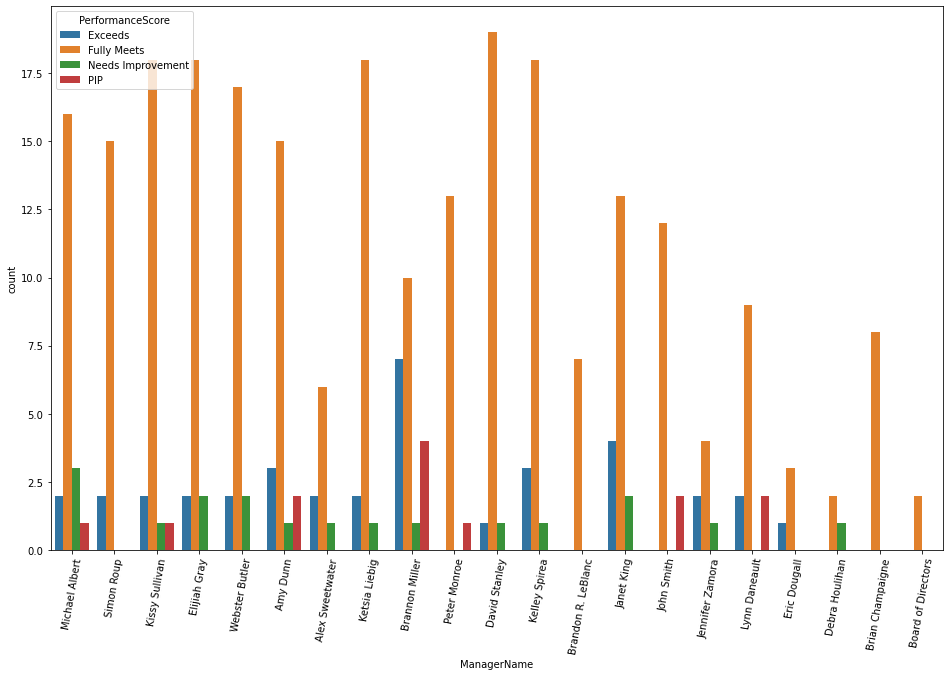

In [34]:
plt.figure(figsize = (16,10))
sns.countplot(x = df["ManagerName"], hue = df["PerformanceScore"])
plt.xticks(rotation = 80)
plt.show()

### As per the observation from above graph, Managers David Stanley, Kelly Spirea have employees with Good Performance

### Brannon Miller has worst performance employees

### 3. Best Recruiting Channel

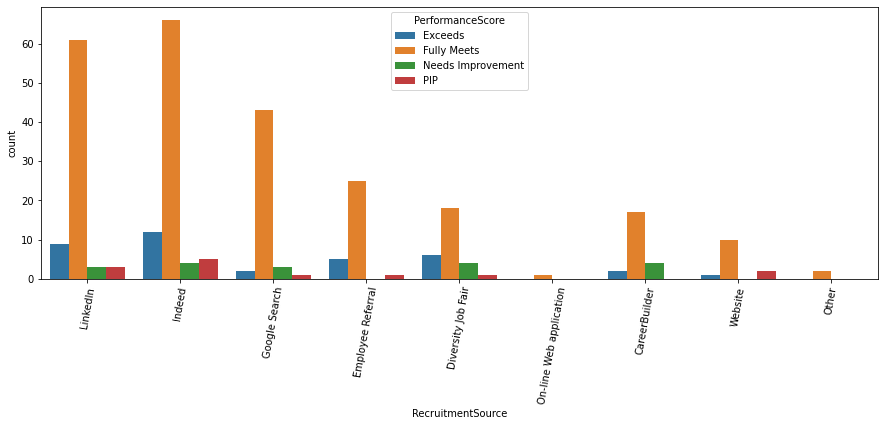

In [44]:
plt.figure(figsize = (15,5))
sns.countplot(x = df["RecruitmentSource"], hue = df["PerformanceScore"])
plt.xticks(rotation = 80)
plt.show()

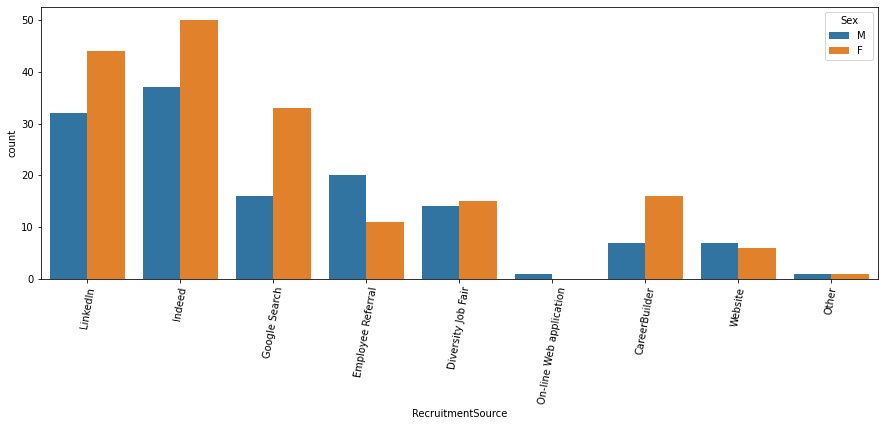

In [45]:
plt.figure(figsize = (15,5))
sns.countplot(x = df["RecruitmentSource"], hue = df["Sex"])
plt.xticks(rotation = 80)
plt.show()

### LinkedIn, Indeed and Google Search ae the better source to get quality resourcesand also more number of diversity employees

### 3 . Predicting who can Resign, any notable factors

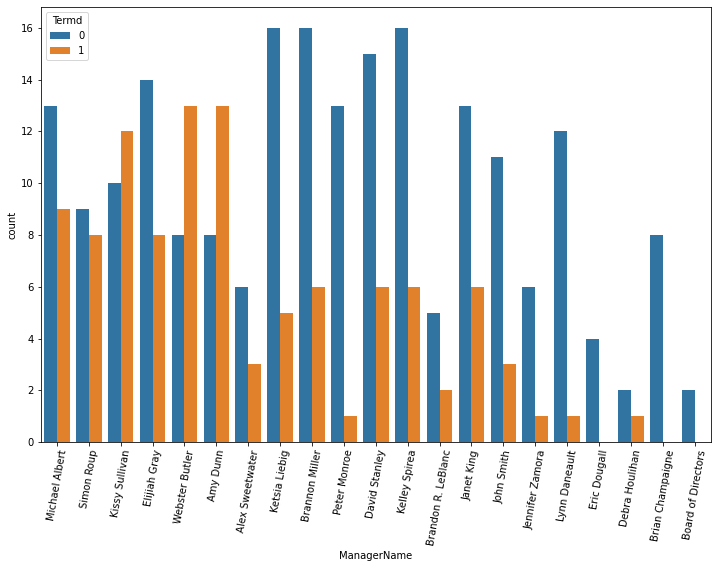

In [53]:
plt.figure(figsize = (12,8))
sns.countplot(x = df["ManagerName"], hue = df["Termd"])
plt.xticks(Rotation = 80)
plt.show()

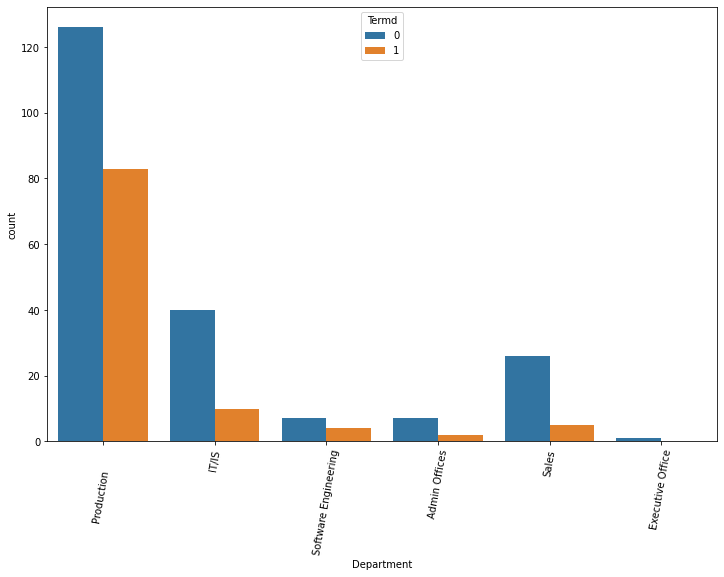

In [59]:
plt.figure(figsize = (12,8))
sns.countplot(x = df["Department"], hue = df["Termd"])
plt.xticks(Rotation = 80)
plt.show()

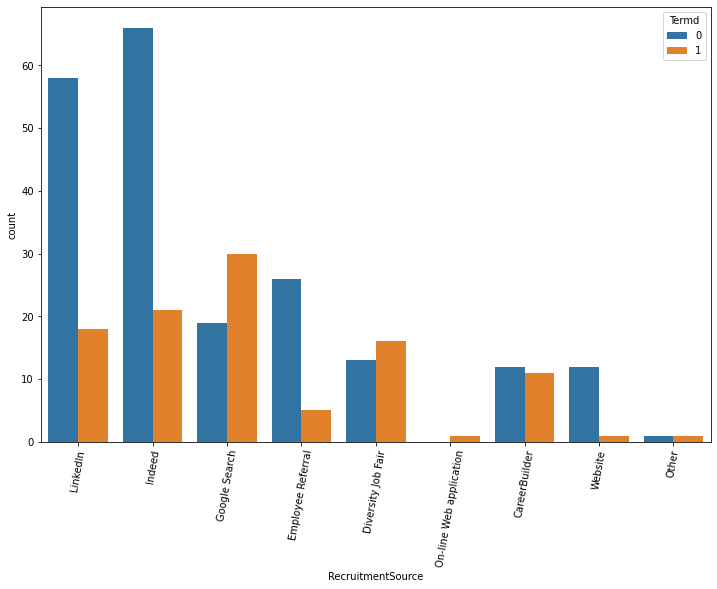

In [60]:
plt.figure(figsize = (12,8))
sns.countplot(x = df["RecruitmentSource"], hue = df["Termd"])
plt.xticks(Rotation = 80)
plt.show()

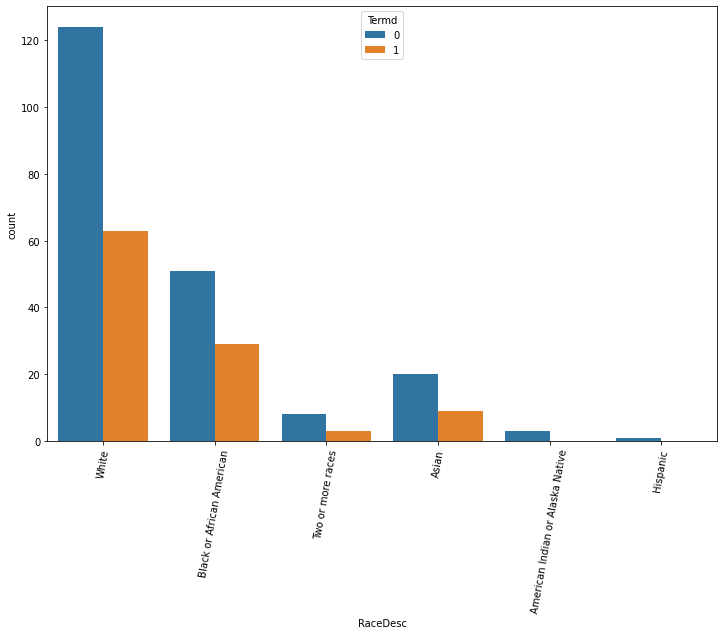

In [63]:
plt.figure(figsize = (12,8))
sns.countplot(x = df[""], hue = df["Termd"])
plt.xticks(Rotation = 80)
plt.show()

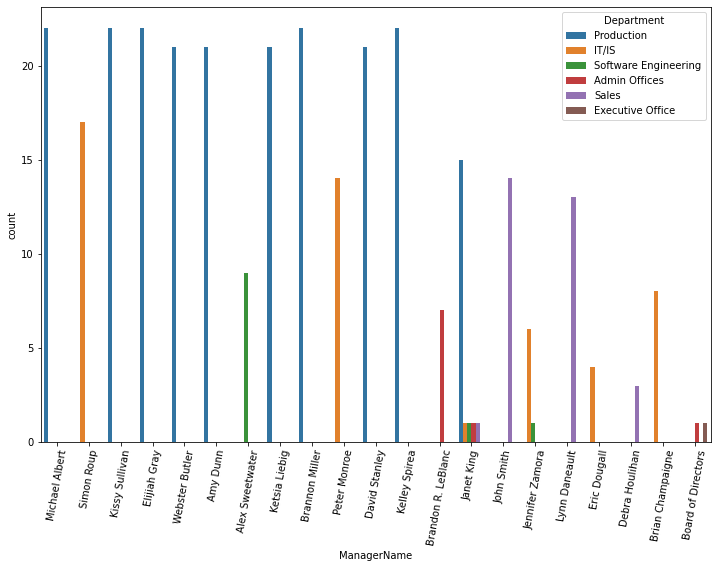

In [64]:
plt.figure(figsize = (12,8))
sns.countplot(x = df["ManagerName"], hue = df["Department"])
plt.xticks(Rotation = 80)
plt.show()

### As per the above graphs we can callout below pointers
    1.Resignation is more in Production dept, specifically the employees working under Kissy Sullivan, Webster Butler and Amy Dunn
    2.Employees Recruited from Google Serach Recruiting channel are moe likely to resign

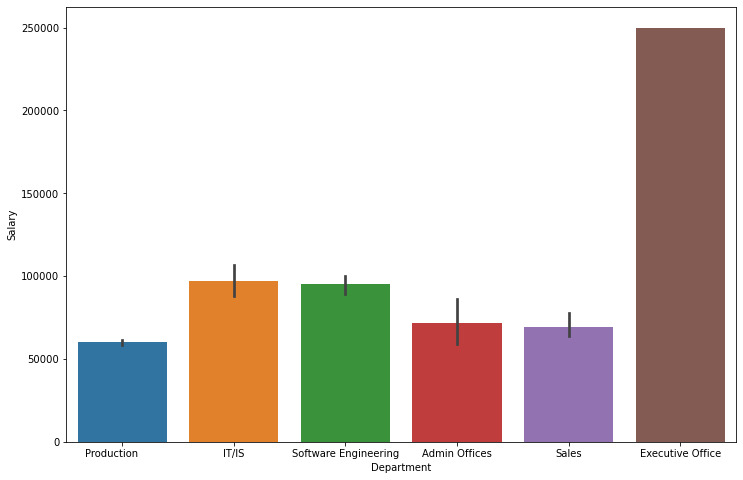

In [70]:
plt.figure(figsize = (12,8))
sns.barplot(x = df["Department"], y = df["Salary"])
#plt.xticks(Rotation = 80)
plt.show()

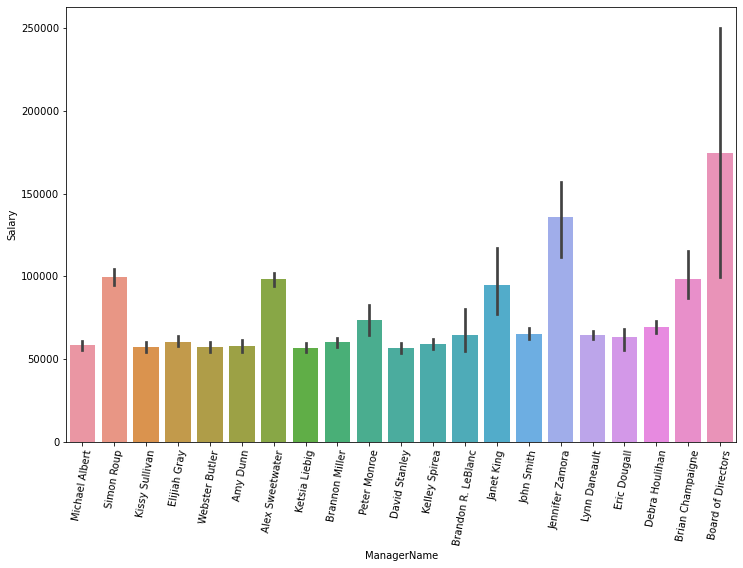

In [74]:
plt.figure(figsize = (12,8))
sns.barplot(x = df["ManagerName"], y = df["Salary"])
plt.xticks(Rotation = 80)
plt.show()

### Below are the observations about Salary
1. Employees Part of Executive Office are paid high followed by IT/IS and Software Engineering
2. People under managers Jeniffer Zamora(Software Engineering), Alex Sweetwater(Software Engineering),Simon Roup(Software Engineering), Janer King(multiple departments
3. Rest other dept and manager line employees are paid alomost the same salary